# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
'''# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe())'''

'# Example reading the SQL database from here\n\nfrom utils import db_connect\nimport pandas as pd\nengine = db_connect()\n\ndataframe = pd.read_sql("Select * from books;", engine)\nprint(dataframe.describe())'

Predecir el coste del seguro médico de una persona

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos fisológicos de sus clientes cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

En este conjunto de datos encontrarás las siguientes variables:

- age. Edad del beneficiario principal (numérico)
- sex. Género del beneficiario principal (categórico)
- bmi. Indice de masa corporal (numérico)
- children. Número de niños/dependientes cubiertos por el seguro de salud (numérico)
- smoker. ¿Es fumador? (categórico)
- region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- charges. Prima del seguro médico (numerico)

## Paso 1: Carga del conjunto de datos

In [2]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


## Paso 2: Realiza un EDA completo

In [4]:
# Obtener las dimensiones
dataframe.shape

(1338, 7)

El dataframe tiene 1338 filas y 7 columnas.

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [7]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()


0

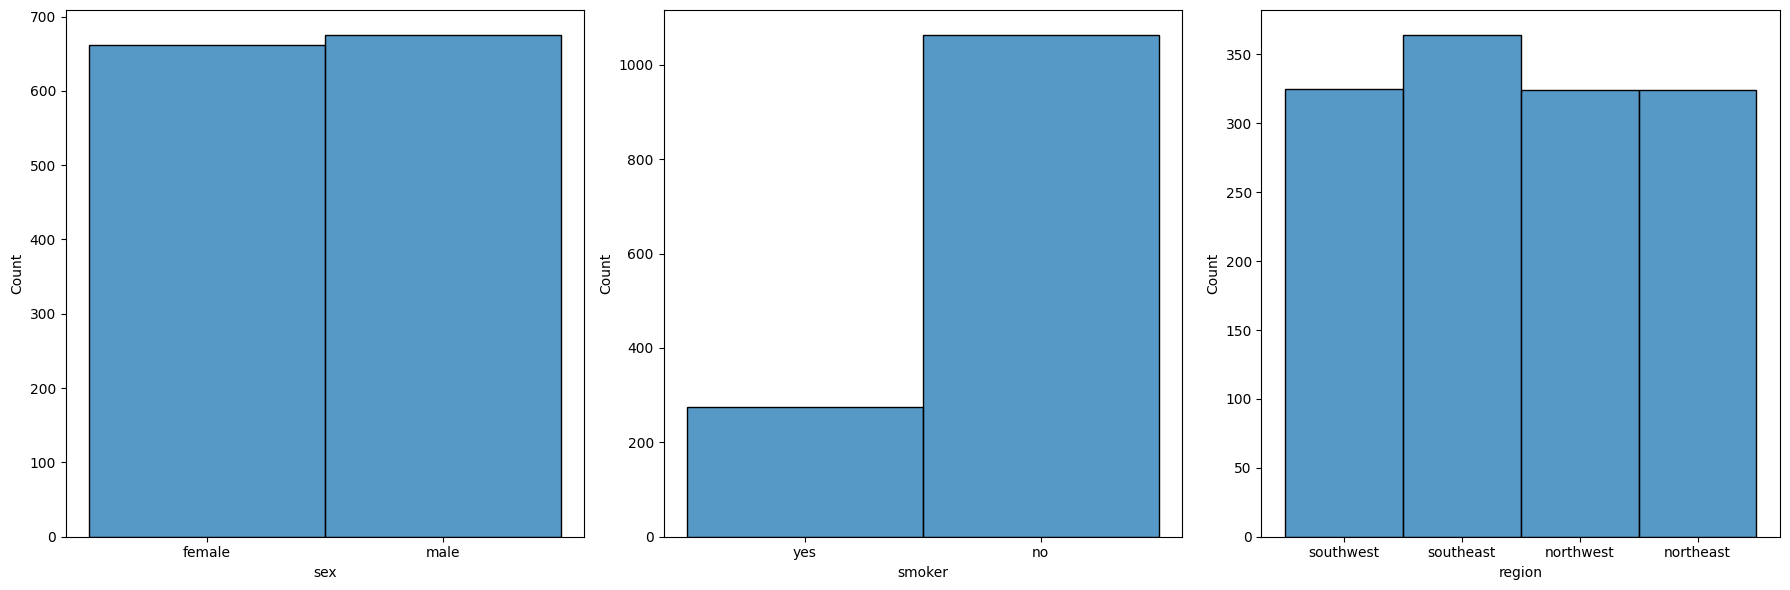

In [8]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Crear histograma
sns.histplot(ax=axes[0], data=dataframe, x='sex')
sns.histplot(ax=axes[1], data=dataframe, x='smoker')
sns.histplot(ax=axes[2], data=dataframe, x='region')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


conclusiones:

- sex: practicamente mismo numero de datos para hombre y mujer.
- smoker: la mayoria de los clientes son no fumadores.
- region: no hay grandes diferencias en la distribucion de las regiones aunq el sureste tiene un ligero aumento de datos.

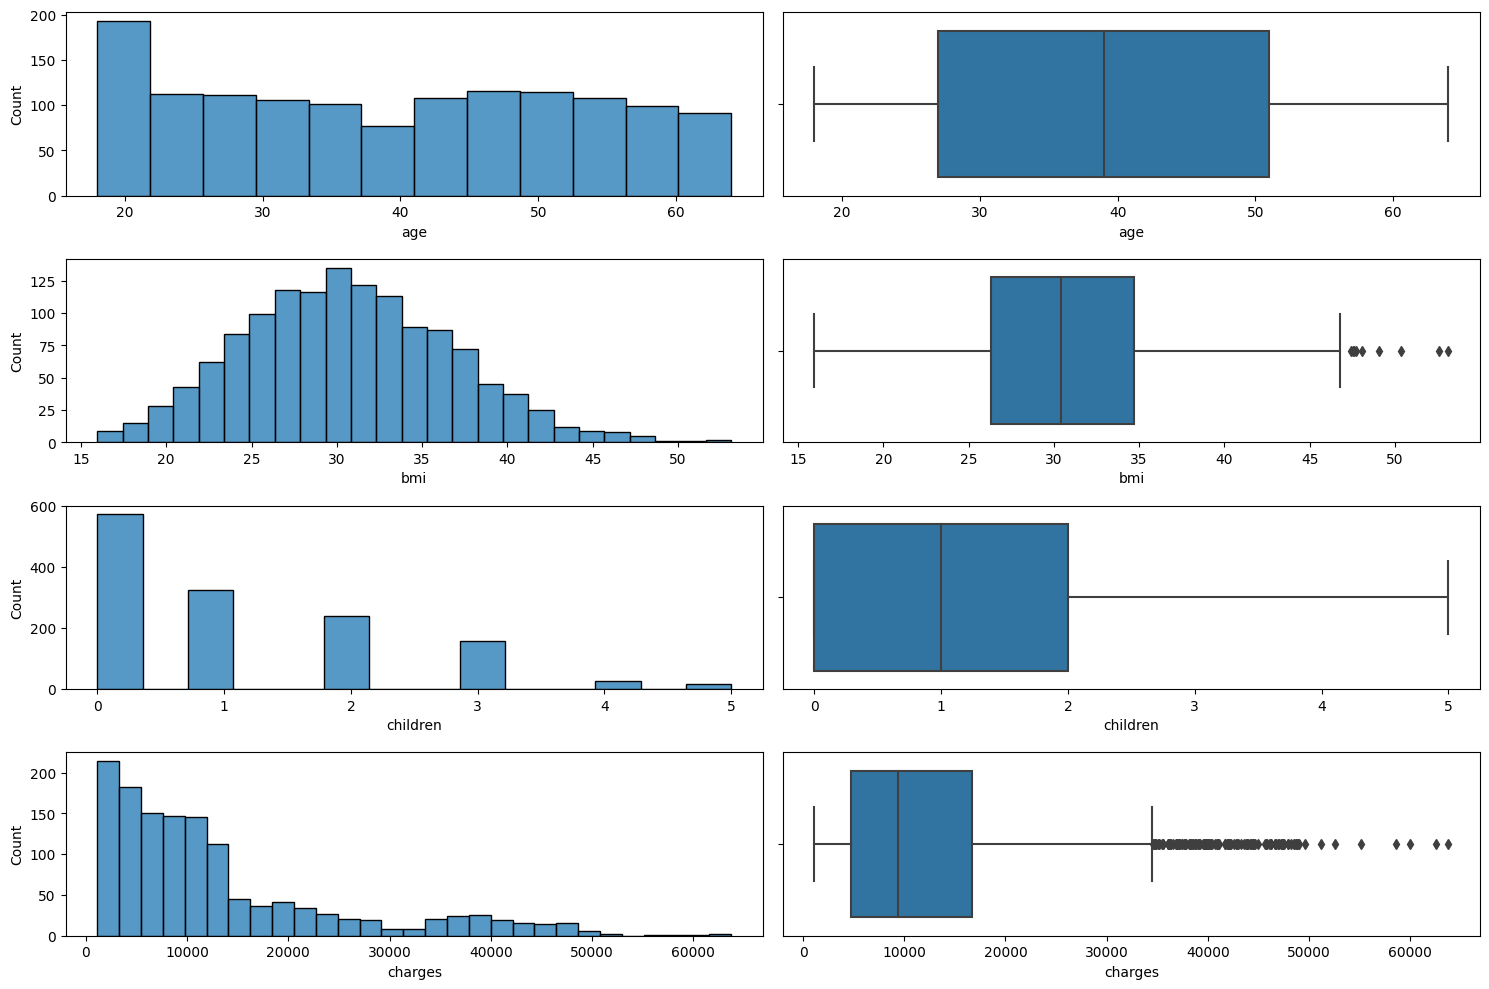

In [9]:
#Análisis sobre variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 10 filas y 2 columnas
fig, axis = plt.subplots(4, 2, figsize=(15, 10))

# Gráficos de las nuevas variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="age")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="age")
sns.histplot(ax=axis[1, 0], data=dataframe, x="bmi")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="bmi")
sns.histplot(ax=axis[2, 0], data=dataframe, x="children")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="children")
sns.histplot(ax=axis[3, 0], data=dataframe, x="charges")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

conclusiones:

- Age: El histograma muestra que la mayoría de los clientes tienen edades comprendidas entre aproximadamente 22 y 70 años, con un pico alrededor de los 18-22 años. El diagrama de caja muestra que no hay valores atípicos significativos y que la mediana se encuentra alrededor de los 38 años.
- bmi: de 25 a 29 es sobrepeso y 30 o mas es obesidad. por debajo de 18,5 es bajo peso. Con esto podemos decir que hay una gran parte de los clientes tienen sobrepeso y obesidad. hay pocos clientes con un peso saludable que corresponderia con 18,5-24,9, y pocos clientes con bajo peso. El diagrama de caja muestra que hay valores atípicos a partir de 46 y la mediana se situa en 30,5 
- children: la maoria de los clientes no tiene niños cubiertos por el seguro. hay clientes que tienen asegurados de 1 a 5 hijos, ganando los que tienen solo 1 hijo asegurado. El diagrama de caja muestra que  no hay valores atípicos y se situa la mediana en 1
- charges: vemos que de 5000-12000 se mantienen unas primas mas o menos iguales. por debajo de 5000 vemos q hay primas mas bajas pero que mas clientes las tienen. a partir de 12000 disminuye bastante la prima aunque llega hasta los 650000. El diagrama de caja muestra que hay valores atípicos a partir de los 5000 y la media esta en 9500

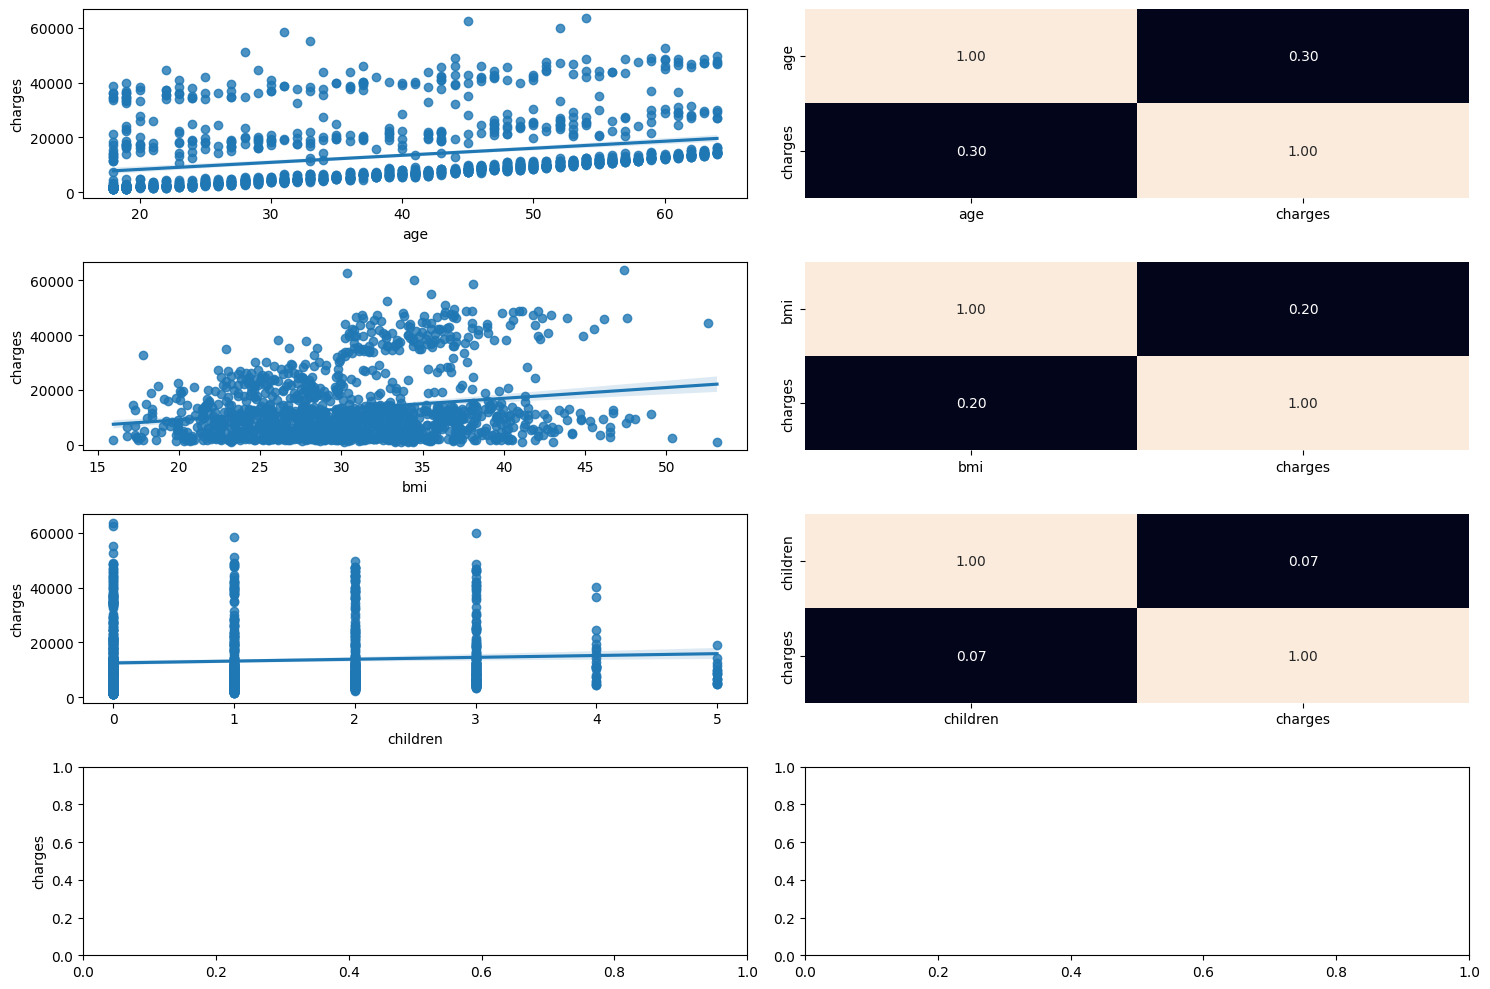

In [10]:
#Análisis numérico-numérico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 6 filas y 2 columnas
fig, axis = plt.subplots(4, 2, figsize=(15, 10))


sns.regplot(ax=axis[0, 0], data=dataframe, x="age", y="charges")
sns.heatmap(dataframe[["age", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[1, 0].set_ylabel("charges")

sns.regplot(ax=axis[1, 0], data=dataframe, x="bmi", y="charges")
sns.heatmap(dataframe[["bmi", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[2, 0].set_ylabel("charges")

sns.regplot(ax=axis[2, 0], data=dataframe, x="children", y="charges")
sns.heatmap(dataframe[["children", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[3, 0].set_ylabel("charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

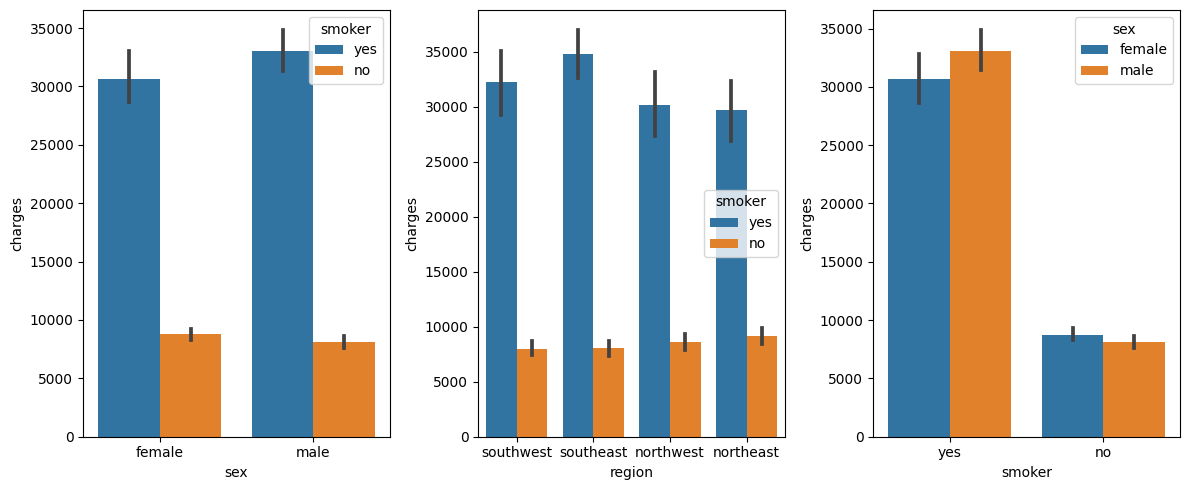

In [36]:
#Análisis categórico-categórico


fig, axis = plt.subplots(figsize=(12,5), ncols=3)

# Plot the Data 
sns.barplot(ax=axis[0], data= dataframe, x='sex', y='charges', hue='smoker')
sns.barplot(ax=axis[1], data= dataframe, x='region',y='charges', hue='smoker')
sns.barplot(ax=axis[2], data= dataframe, x='smoker', y='charges', hue='sex')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

conclusiones:
- vemos q hay buena correlacion entre age y bmi con charges. Children no tiene mucha correlacion por lo que la descartaremos mas adelante

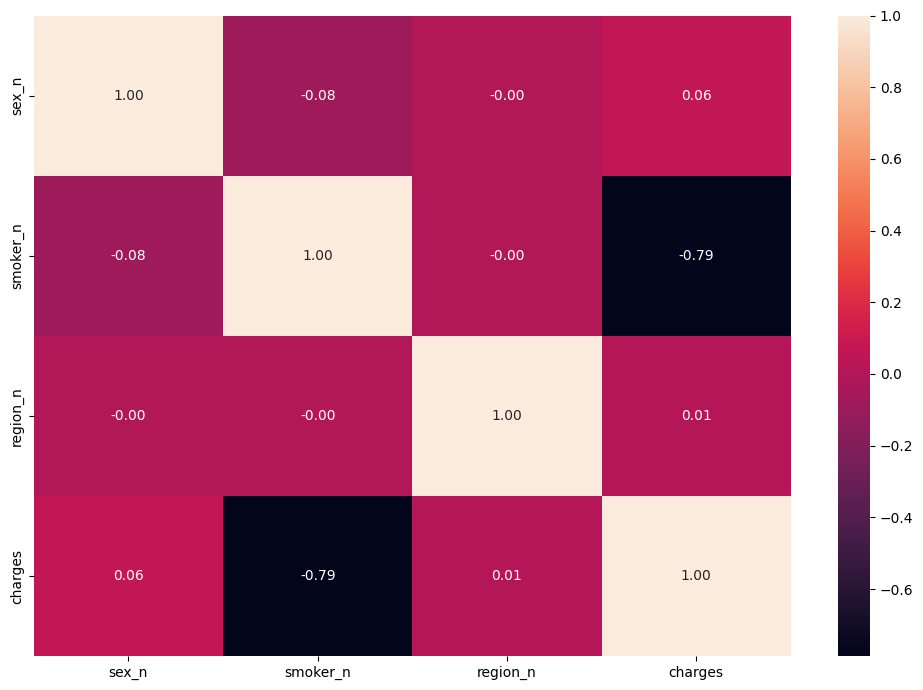

In [40]:
#Análisis categórico a numerico con facotorize

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
dataframe_copy = dataframe.copy()

fig, axis = plt.subplots(figsize=(10, 7))

# Convert categorical columns to numerical using factorize on the copied DataFrame
dataframe_copy['sex_n'] = pd.factorize(dataframe_copy['sex'])[0]
dataframe_copy['smoker_n'] = pd.factorize(dataframe_copy['smoker'])[0]
dataframe_copy['region_n'] = pd.factorize(dataframe_copy['region'])[0]

# Plot the correlation heatmap
sns.heatmap(dataframe_copy[['sex_n', 'smoker_n', 'region_n', 'charges']].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()



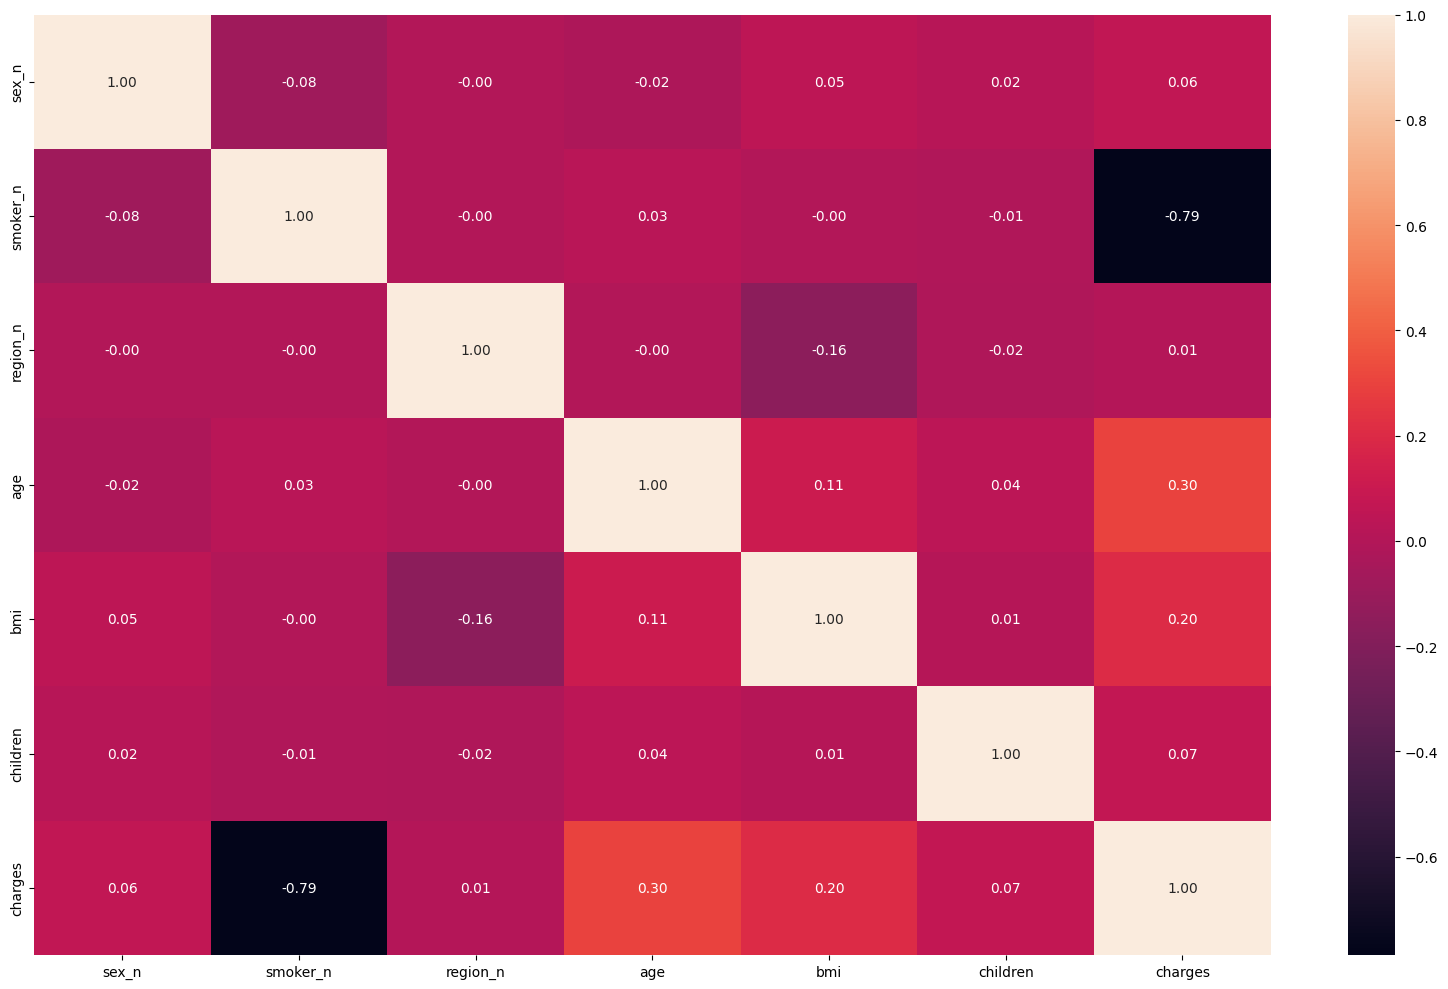

In [41]:
# Heatmap categorico-numerico

# Draw a Canvas
fig, axis = plt.subplots(figsize = (16, 10))

# Plot a Heatmap
sns.heatmap(dataframe[['sex_n', 'smoker_n', 'region_n', 'age', 'bmi', 'children', 'charges']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

conclusiones:
- vemos q hay una fuerte relacion entre los fumadores y la prima de seguro medico.
- tambien estan relacionadas la edad y el bmi con la prima de seguro medico. vamos a analizar estas 3 varibles

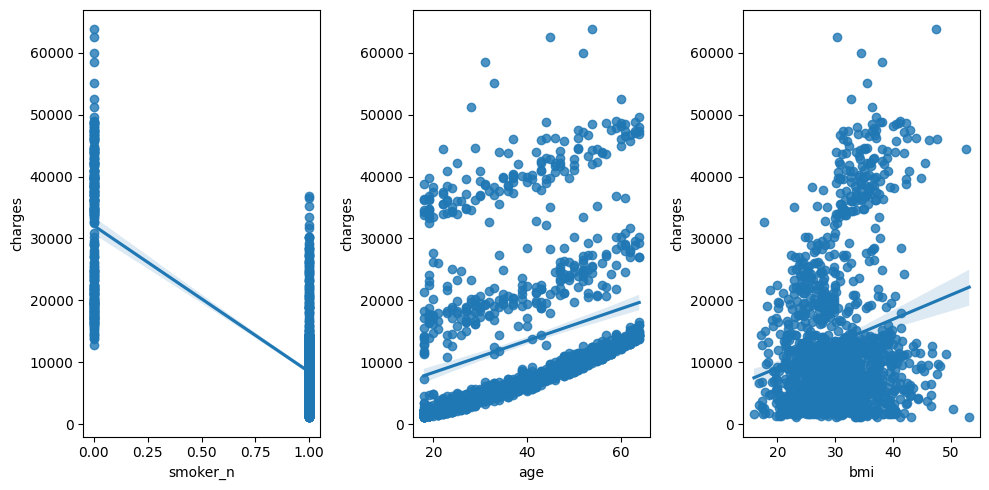

In [14]:
#Analizamos las variables mas altas

fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = dataframe, x = "smoker_n", y = "charges")
sns.regplot(ax = axis[1], data = dataframe, x = "age", y = "charges")
sns.regplot(ax = axis[2], data = dataframe, x = "bmi", y = "charges")

plt.tight_layout()

plt.show()

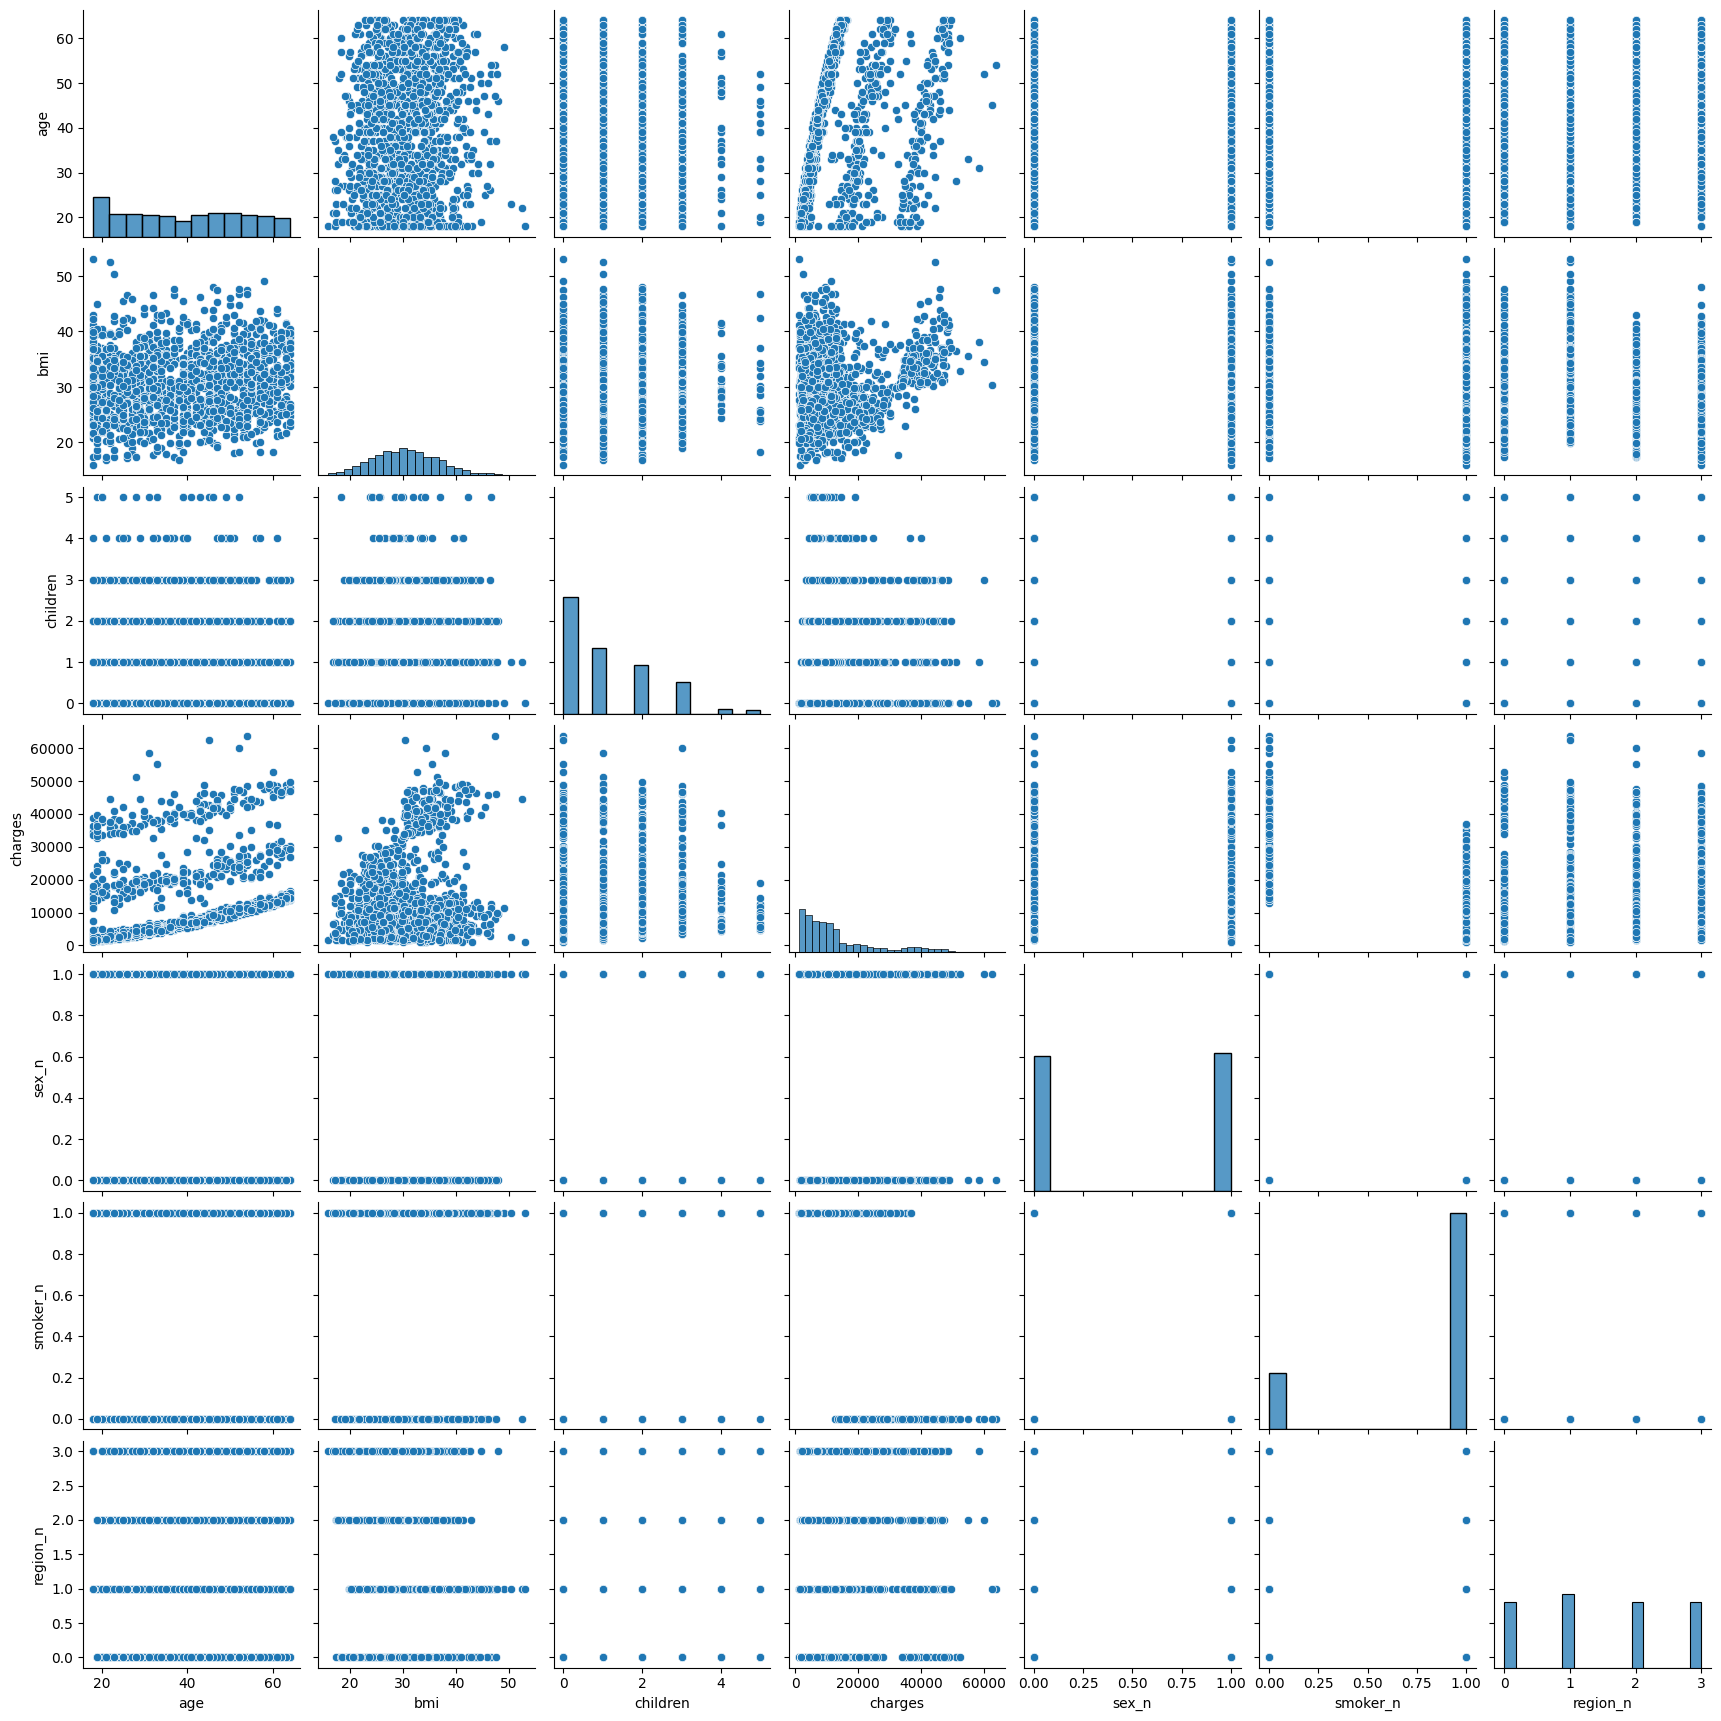

In [15]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [16]:
#análisis descriptivo

dataframe.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


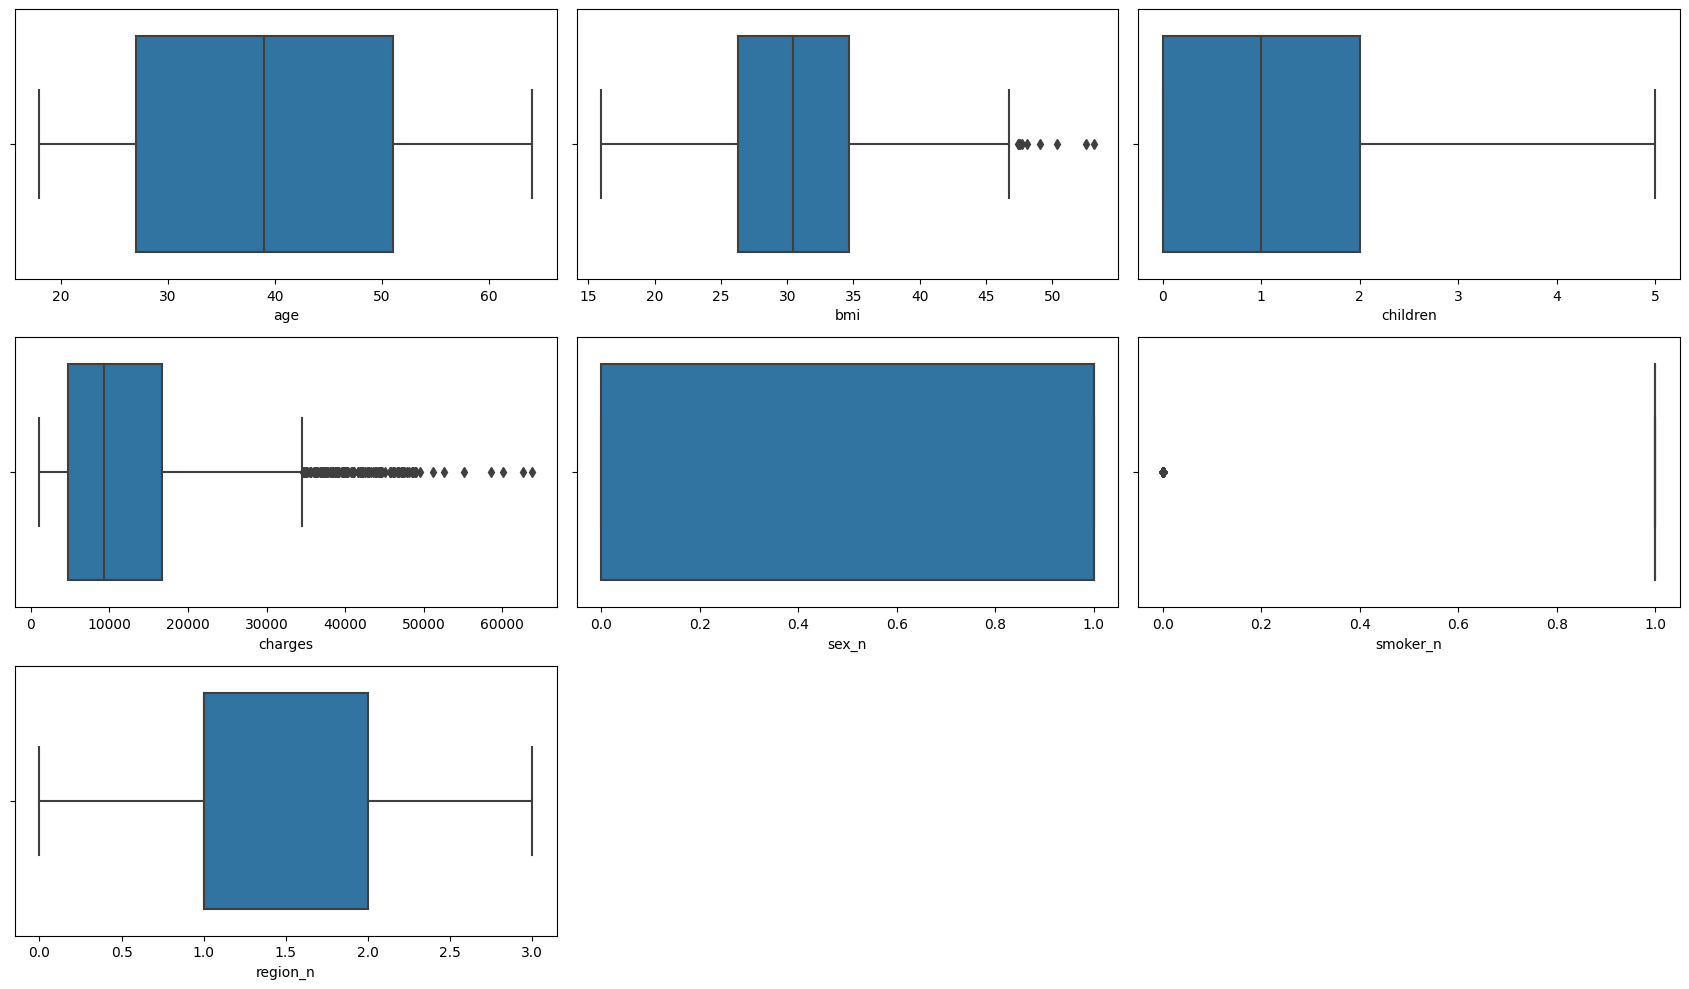

In [17]:
#Buscar outliers

fig, axis = plt.subplots(3, 3, figsize=(17,10))

sns.boxplot(ax=axis[0,0], data=dataframe, x='age')
sns.boxplot(ax=axis[0,1], data=dataframe, x='bmi')
sns.boxplot(ax=axis[0,2], data=dataframe, x='children')
sns.boxplot(ax=axis[1,0], data=dataframe, x='charges')
sns.boxplot(ax=axis[1,1], data=dataframe, x='sex_n')
sns.boxplot(ax=axis[1,2], data=dataframe, x='smoker_n')
sns.boxplot(ax=axis[2,0], data=dataframe, x='region_n')

fig.delaxes(axis[2,1])
fig.delaxes(axis[2,2])

plt.tight_layout()

plt.show()

conclusion:
- vemos outliers en bmi y  charges, pero no vamos a eliminarlos porque hay muy pocos. Los outliers de charges supongo que es porque hay primas que pueden llegar a ser muy elevadas, son casos aislados, pero lo dejamos ya que nos interesan

In [18]:
# Analizar outliers para cada variable seleccionada
all_variables = ['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']

for variable in all_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr


    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")


count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en age son 87.0 y -9.0, con un rango intercuartílico de 24.0

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en bmi son 47.32 y 13.67, con un rango intercuartílico de 8.41

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en children son 5.0 y -3.0, con un rango intercuartílico de 2.0

count     1337.000000
mean     13

In [19]:
#Análisis de valores faltantes

dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [20]:
#Escalado Mínimo-Máximo

from sklearn.preprocessing import MinMaxScaler

num_variables = ['age', 'bmi','children', 'sex_n', 'smoker_n', 'region_n', 'charges']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
dataframe_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
dataframe_scal.head()


,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [21]:
'''# Eliminar la columna 'sex_n'
dataframe_scal.drop('children', axis=1, inplace=True)

dataframe_scal.head()'''

"# Eliminar la columna 'sex_n'\ndataframe_scal.drop('children', axis=1, inplace=True)\n\ndataframe_scal.head()"

In [22]:
#feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = dataframe_scal.drop('charges', axis = 1)
y = dataframe_scal['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

X_train_sel.head()


,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [23]:
X_test_sel.head()


,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [24]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\015-PROYECTO1-LINEAR-REGRESSION-main\src\clean_train.csv", index=False)
X_test_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\015-PROYECTO1-LINEAR-REGRESSION-main\src\clean_test.csv", index=False)

## Paso 3: Construye un modelo de regresión lineal

In [25]:
# Regresión lineal múltiple

#Paso 1. Lectura del conjunto de datos procesado¶

import pandas as pd
import matplotlib.pyplot as plt 

train_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\015-PROYECTO1-LINEAR-REGRESSION-main\src\clean_train.csv")
test_data = pd.read_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\015-PROYECTO1-LINEAR-REGRESSION-main\src\clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


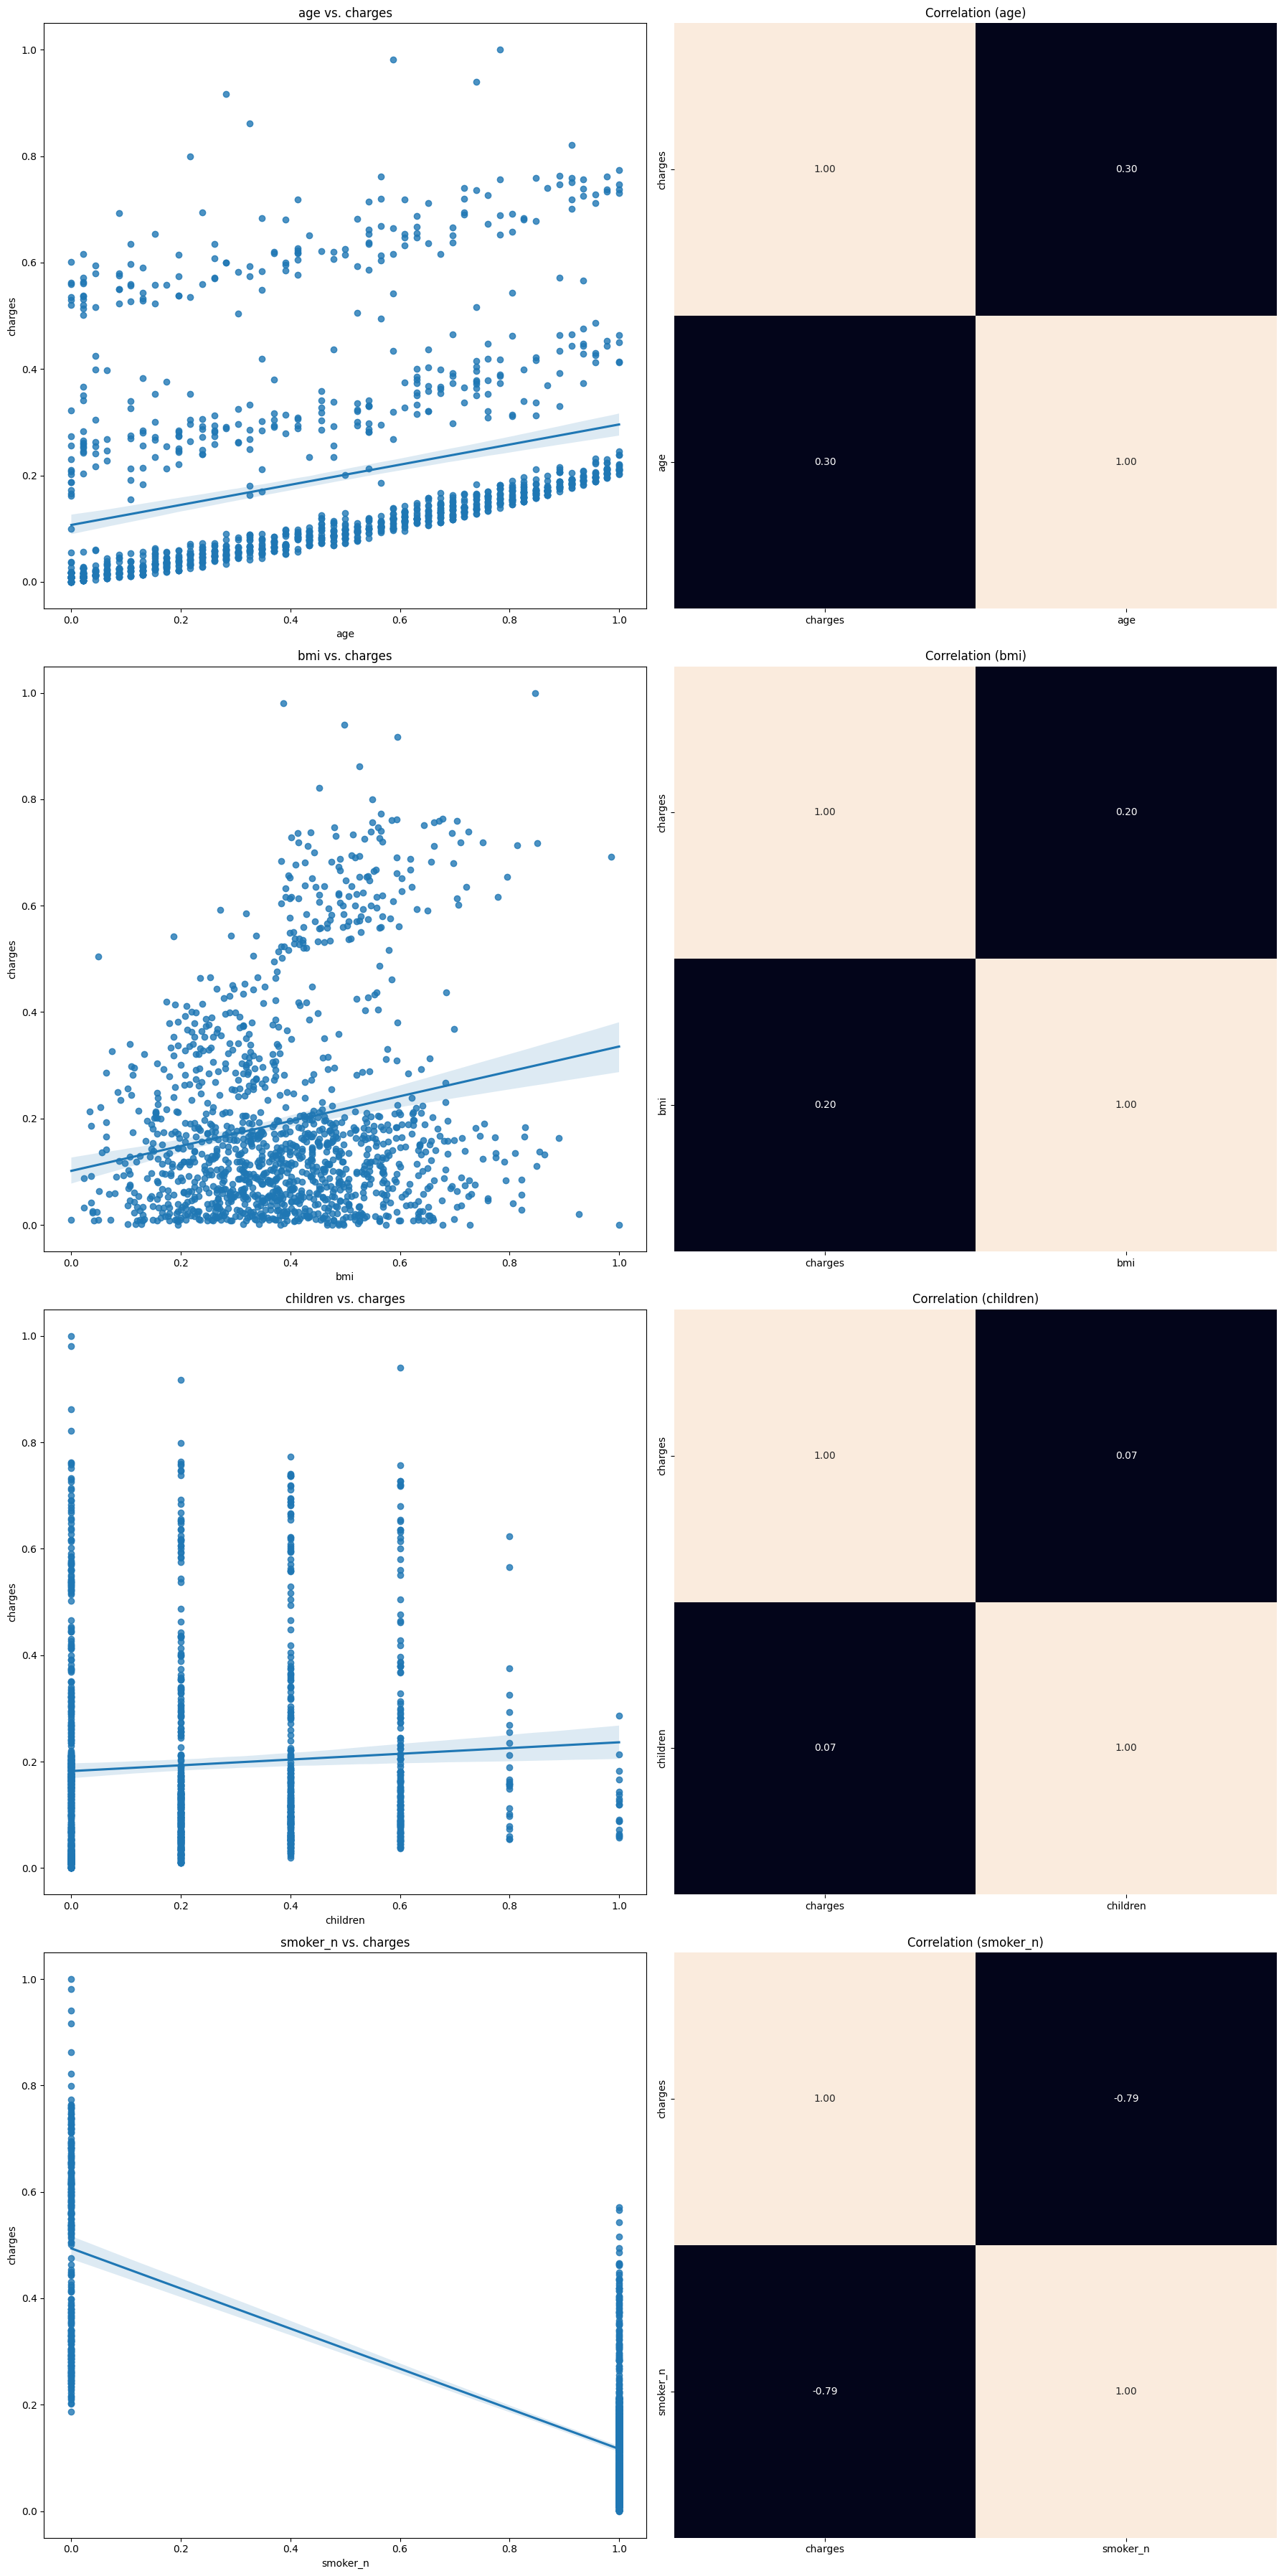

In [26]:
#utilizando un diagrama de puntos se visualizará la relación entre la variable predictora y las variables objetivo

fig, axis = plt.subplots(4, 2, figsize=(18, 36))
total_data = pd.concat([train_data, test_data])

# Scatter Plot 1
sns.regplot(data=total_data, x="age", y="charges", ax=axis[0, 0])
axis[0, 0].set_title("age vs. charges")

# Heatmap 1
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[0, 1].set_title("Correlation (age)")

# Scatter Plot 2
sns.regplot(data=total_data, x="bmi", y="charges", ax=axis[1, 0])
axis[1, 0].set_title("bmi vs. charges")

# Heatmap 2
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation (bmi)")

# Scatter Plot 3
sns.regplot(data=total_data, x="children", y="charges", ax=axis[2, 0])
axis[2, 0].set_title("children vs. charges")

# Heatmap 3
sns.heatmap(total_data[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[2, 1].set_title("Correlation (children)")

# Scatter Plot 6
sns.regplot(data=total_data, x="smoker_n", y="charges", ax=axis[3, 0])
axis[3, 0].set_title("smoker_n vs. charges")

# Heatmap 6
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)
axis[3, 1].set_title("Correlation (smoker_n)")

plt.tight_layout()
plt.show()

In [27]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [28]:
# Paso 2: Inicialización y entrenamiento del modelo¶

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Después del proceso de entrenamiento podemos conocer los parámetros que ha ajustado el modelo

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 0.3195827183308948
Coeficientes (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [30]:
# Paso 3: Predicción del modelo

y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [31]:
# Test The Model Accuracy
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.009150574110331995
Coeficiente de determinación: 0.8045531086669289


## Paso 4: Optimiza el modelo anterior

In [32]:
#optimizacion GRID SEARCH

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# We define the parameters by hand that we want to adjust
hyperparams = {
    'copy_X': [True, False],  
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = 'neg_mean_squared_error', cv = 5)
grid

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False]},
             scoring='neg_mean_squared_error')

In [33]:
#ver resultados

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'copy_X': True}


In [34]:
# mejores hiperparametros y modelo
best_params = grid.best_params_
best_model = grid.best_estimator_

In [35]:
# resultados finales evaluacion
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test MSE: {mse}")

Best Hyperparameters: {'copy_X': True}
Test MSE: 0.009150574110331995
